In [75]:
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, grid_search, cross_validation, preprocessing
from collections import Counter
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm



pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 17)

%matplotlib inline
plt.style.use('ggplot')

In [76]:
df_overdoses = pd.read_csv(os.path.join('overdoses.csv')) 
df_opioids = pd.read_csv(os.path.join('opioids.csv'))
df_prescriber= pd.read_csv(os.path.join('prescriber-info.csv'))


In [77]:
df_overdoses 

,State,Population,Deaths,Abbrev
0,Alabama,4833722,723,AL
1,Alaska,735132,124,AK
2,Arizona,6626624,1211,AZ
3,Arkansas,2959373,356,AR
4,California,38332521,4521,CA
...,...,...,...,...
45,Virginia,8260405,980,VA
46,Washington,6971406,979,WA
47,West Virginia,1854304,627,WV
48,Wisconsin,5742713,853,WI


In [78]:
df_opioids

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN
...,...,...
108,XODOL 7.5-300,HYDROCODONE/ACETAMINOPHEN
109,XYLON 10,HYDROCODONE/IBUPROFEN
110,ZAMICET,HYDROCODONE/ACETAMINOPHEN
111,ZOHYDRO ER,HYDROCODONE BITARTRATE


In [79]:
df_prescriber 

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,...,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,...,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,...,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,...,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,...,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,...,0,0,17,28,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1619019353,F,WA,M.D.,Family Practice,0,12,0,...,0,0,39,0,0,0,0,1
24996,1780693671,F,MI,DO,Internal Medicine,0,15,0,...,0,0,20,0,0,0,0,1
24997,1346270956,M,AZ,MD,Emergency Medicine,0,0,0,...,0,0,0,0,0,0,0,1
24998,1023116514,F,IN,M.D.,Family Practice,0,0,0,...,0,0,0,0,0,0,0,1


In [80]:
print"Describtion of Death Overdoses \n", df_overdoses.Deaths.describe()

df_maxOD= df_overdoses[df_overdoses.Deaths==df_overdoses.Deaths.max()]
df_minOD= df_overdoses[df_overdoses.Deaths==df_overdoses.Deaths.min()]

print "State with the highest", df_maxOD.iat[0, 0], "with the popluation of", df_maxOD.iat[0, 1], "and Death rate of", df_maxOD.iat[0, 2]
print "State with the lowest", df_minOD.iat[0, 0], "with the popluation of", df_minOD.iat[0, 1], "and Death rate of", df_minOD.iat[0, 2]

Describtion of Death Overdoses 
count      50.000000
mean      939.180000
std       898.195486
min        43.000000
25%       281.000000
50%       712.000000
75%      1209.750000
max      4521.000000
Name: Deaths, dtype: float64
State with the highest California with the popluation of 38332521 and Death rate of 4521
State with the highest North Dakota with the popluation of 723393 and Death rate of 43


In [87]:
normpop= preprocessing.normalize(df_overdoses.Population, norm='l2')

normpop
#overdoses/populartion *100000

#df_overdoses["PopNorm"]= pd.Series(normpop, index=df_overdoses.index) 

/Users/lgayhardt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/lgayhardt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.07259269,  0.01104019,  0.09951843,  0.04444377,  0.5756766 ,
         0.07912017,  0.05400582,  0.01390287,  0.29364424,  0.15006205,
         0.02108604,  0.02421101,  0.1934635 ,  0.0986816 ,  0.04641177,
         0.04346136,  0.0660084 ,  0.06946516,  0.0199484 ,  0.08903874,
         0.10051262,  0.14861214,  0.0814031 ,  0.04492185,  0.09077117,
         0.01524572,  0.02806131,  0.04190218,  0.01987567,  0.13364999,
         0.03131677,  0.29512001,  0.14789786,  0.01086389,  0.17377003,
         0.05782771,  0.05902159,  0.19183654,  0.01579156,  0.07170838,
         0.01268834,  0.09755639,  0.39719814,  0.0435652 ,  0.00941071,
         0.1240545 ,  0.10469636,  0.02784788,  0.08624388,  0.00875034]])

In [93]:
def OD_pop(row):
    return (row.Deaths/row.Population)*100000

df_overdoses['Norm']=OD_pop(df_overdoses)
df_overdoses.head()

,State,Population,Deaths,Abbrev,Norm
0,Alabama,4833722,723,AL,14.957418
1,Alaska,735132,124,AK,16.867719
2,Arizona,6626624,1211,AZ,18.274766
3,Arkansas,2959373,356,AR,12.029575
4,California,38332521,4521,CA,11.794163


In [136]:
df_maxOD_norm= df_overdoses[df_overdoses.Norm==df_overdoses.Norm.max()]
df_minOD_norm= df_overdoses[df_overdoses.Norm==df_overdoses.Norm.min()]

print "State with the highest rate of death overdoses per capita ", df_maxOD_norm.iat[0, 0],"with the popluation of", df_maxOD_norm.iat[0, 1],"and Death rate of", df_maxOD_norm.iat[0, 2]
print "State with the lowest rate of death overdoses per capita", df_minOD_norm.iat[0, 0]



State with the highest rate of death overdoses per capita  West Virginia with the popluation of 1854304 and Death rate of 627
State with the highest rate of death overdoses per capita North Dakota


In [97]:
print"Describtion of Gender of Prescribers \n", df_prescriber.Gender.describe()


Describtion of Gender of Prescribers 
count     25000
unique        2
top           M
freq      15574
Name: Gender, dtype: object


In [98]:
print"Describtion of State of Prescribers \n", df_prescriber.State.describe()

Describtion of State of Prescribers 
count     25000
unique       57
top          CA
freq       2562
Name: State, dtype: object


In [99]:
print"Describtion of Specialty of Prescribers \n", df_prescriber.Specialty.describe()

Describtion of Specialty of Prescribers 
count                 25000
unique                  109
top       Internal Medicine
freq                   3194
Name: Specialty, dtype: object


In [103]:
print"Describtion of Credentials of Prescribers \n", df_prescriber.Credentials.describe()

Describtion of Credentials of Prescribers 
count     24237
unique      887
top          MD
freq       7034
Name: Credentials, dtype: object


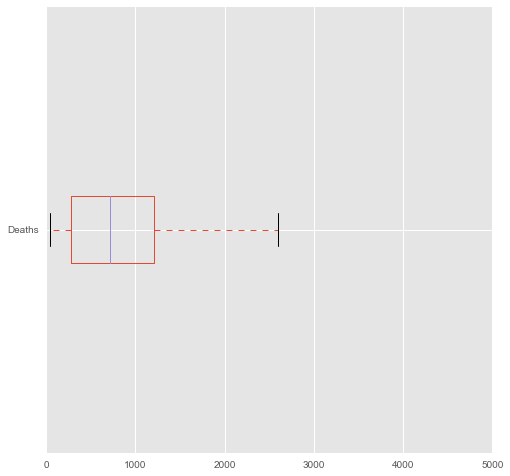

In [104]:
df_overdoses.Deaths.plot(kind = 'box', figsize = (8, 8), vert = False)

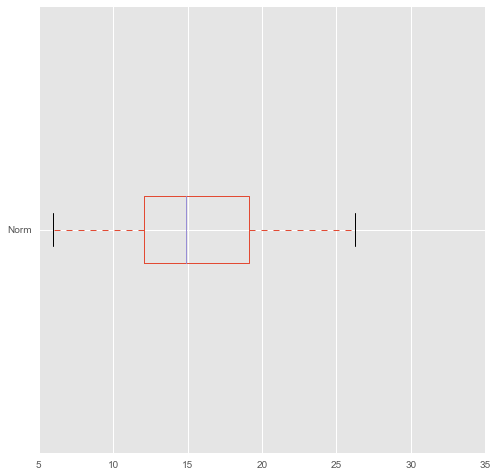

In [105]:
df_overdoses.Norm.plot(kind = 'box', figsize = (8, 8), vert = False)

In [134]:
#df_prescriber.State.plot(kind='bar')
Statefreq= pd.crosstab(index= df_prescriber["State"], columns="count")

Statefreq

KeyError: 'State'

KeyError: 'Gender'